<a href="https://colab.research.google.com/github/CabecaDeCenoura/Inteligencia-Artificial-Iris/blob/main/C%C3%B3digo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
names = ['SepalLength', 'SepalWidth',
         'PetalLength', 'PetalWidth',
         'Class']
df = pd.read_csv('iris.data', names=names)

In [ ]:
print("Linhas: %d, Colunas: %d" % (len(df), len(df.columns)))

Linhas: 100, Colunas: 5


In [ ]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df['Class'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Name: Class, dtype: int64

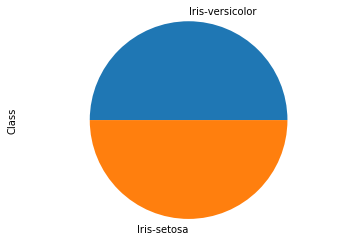

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

df['Class'].value_counts().plot(kind='pie')
plt.axis('equal');

In [ ]:
df['SepalArea'] = df['SepalLength'] * df['SepalWidth']
df['PetalArea'] = df['PetalLength'] * df['PetalWidth']

df['SepalLengthAboveMean'] = df['SepalLength'] > df['SepalLength'].mean()
df['SepalWidthAboveMean'] = df['SepalWidth'] > df['SepalWidth'].mean()

df['PetalLengthAboveMean'] = df['PetalLength'] > df['PetalLength'].mean()
df['PetalWidthAboveMean'] = df['PetalWidth'] > df['PetalWidth'].mean()

df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class,SepalArea,PetalArea,SepalLengthAboveMean,SepalWidthAboveMean,PetalLengthAboveMean,PetalWidthAboveMean
0,5.1,3.5,1.4,0.2,Iris-setosa,17.85,0.28,False,True,False,False
1,4.9,3.0,1.4,0.2,Iris-setosa,14.70,0.28,False,False,False,False
2,4.7,3.2,1.3,0.2,Iris-setosa,15.04,0.26,False,True,False,False
3,4.6,3.1,1.5,0.2,Iris-setosa,14.26,0.30,False,True,False,False
4,5.0,3.6,1.4,0.2,Iris-setosa,18.00,0.28,False,True,False,False


In [ ]:
#TESTES
features = df.columns.difference(['Class'])

X = df[features].values
y = df['Class'].values

print(features)


Index(['PetalArea', 'PetalLength', 'PetalLengthAboveMean', 'PetalWidth',
       'PetalWidthAboveMean', 'SepalArea', 'SepalLength',
       'SepalLengthAboveMean', 'SepalWidth', 'SepalWidthAboveMean'],
      dtype='object')


In [ ]:
from sklearn.tree import DecisionTreeClassifier

classifier_dt = DecisionTreeClassifier(random_state=1986, criterion='gini', max_depth=3)
classifier_dt.fit(X, y)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1986, splitter='best')

In [ ]:
sample1 = [1.0, 2.0, 3.5, 1.0, 10.0, 3.5, False, False, False, False]  # Iris-setosa
sample2 = [5.0, 3.5, 1.3, 0.2, 17.8, 0.2, False, True, False, False]   # Iris-versicolo 

classifier_dt.predict([sample1, sample2])  # Predizendo o tipo da flor

array(['Iris-setosa', 'Iris-versicolor'], dtype=object)

In [ ]:
from sklearn.model_selection import cross_val_score

scores_dt = cross_val_score(classifier_dt, X, y, scoring='accuracy', cv=5)
print(scores_dt.mean())

1.0


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. I

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=1986, n_estimators=50, max_depth=5, n_jobs=-1)
classifier_rf.fit(X, y)

scores_rf = cross_val_score(classifier_rf, X, y, scoring='accuracy', cv=5)
print(scores_rf.mean())

In [ ]:
classifier_rf.fit(X, y)

features_importance = zip(classifier_rf.feature_importances_, features)
for importance, feature in sorted(features_importance, reverse=True):
    print("%s: %f%%" % (feature, importance*100))

PetalLengthAboveMean: 30.000000%
PetalLength: 22.000000%
PetalWidth: 20.424785%
PetalArea: 18.000000%
PetalWidthAboveMean: 8.000000%
SepalLengthAboveMean: 1.216738%
SepalWidth: 0.358477%
SepalWidthAboveMean: 0.000000%
SepalLength: 0.000000%
SepalArea: 0.000000%


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish